In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EDA

In [4]:
df.shape

(5110, 12)

In [5]:
df.head()

#print(df.tail())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.duplicated().sum()

0

### Understanding the columns which are in integer and object types 

In [12]:
print("#######columns with datatypes as object######")
df.select_dtypes(include='object').head()

#######columns with datatypes as object######


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [13]:
print("columns with datatypes as interger")
df.select_dtypes(include="number").head()

columns with datatypes as interger


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


#### Clearing all null values


In [14]:
df1=df

In [15]:
df1.dropna(inplace=True)

In [16]:
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
df1.smoking_status = df1.smoking_status.replace('Unknown',np.NaN)

### Handling missing values on categorical data

In [18]:
df1.smoking_status.isna().sum()

1483

In [19]:
df1.groupby(['smoking_status'])['smoking_status'].count()

smoking_status
formerly smoked     837
never smoked       1852
smokes              737
Name: smoking_status, dtype: int64

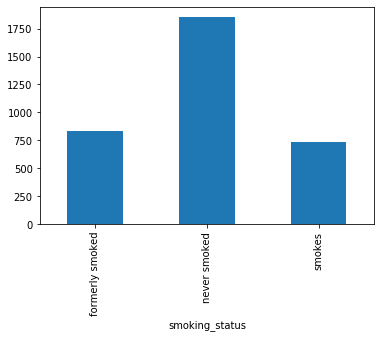

In [20]:
df1.groupby(['smoking_status'])['smoking_status'].count().plot.bar()

In [21]:
df1.smoking_status.isna().mean()

0.302098187003463

In [22]:
df1['smoking_status'].mode()[0]

'never smoked'

In [23]:
df1.smoking_status.fillna(df1['smoking_status'].mode()[0],inplace=True)

In [24]:
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Here , i used Frequently repeated category to replce null values .The frequently repeated categor is 'never smoked'








### some categorical analysis on target variable 'stroke' 

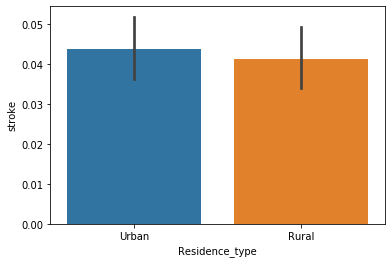

In [25]:
sns.barplot('Residence_type','stroke',data=df1)

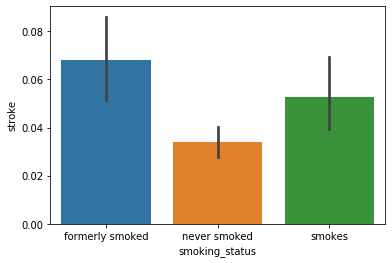

In [26]:
sns.barplot('smoking_status','stroke',data=df1)

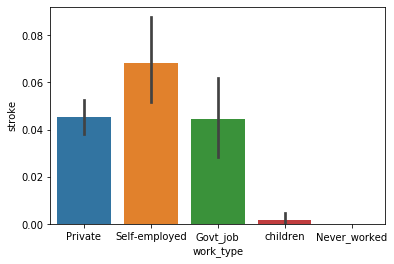

In [27]:
sns.barplot('work_type','stroke',data=df1)

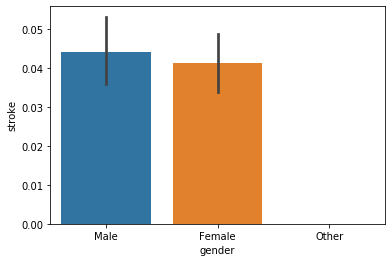

In [28]:
sns.barplot('gender','stroke',data=df1)

In [29]:
df1.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [30]:
'''In column gender has three unique categories,but here the category "Other" is
   very lowest frequently occured ,the unique count of "Other" is only one,so this category can't make an effect on target,
   so delete it ''' 


df1.drop(df1.index[df1['gender'] == 'Other'], inplace=True)


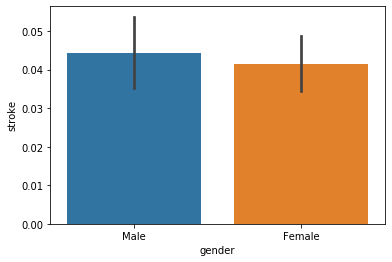

In [31]:
sns.barplot('gender','stroke',data=df1)

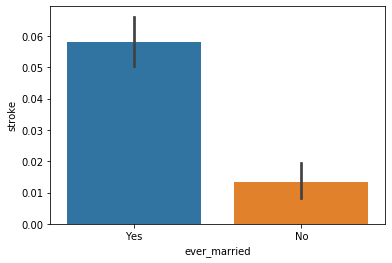

In [32]:
sns.barplot('ever_married','stroke',data=df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7DA2C8>,
      dtype=object)

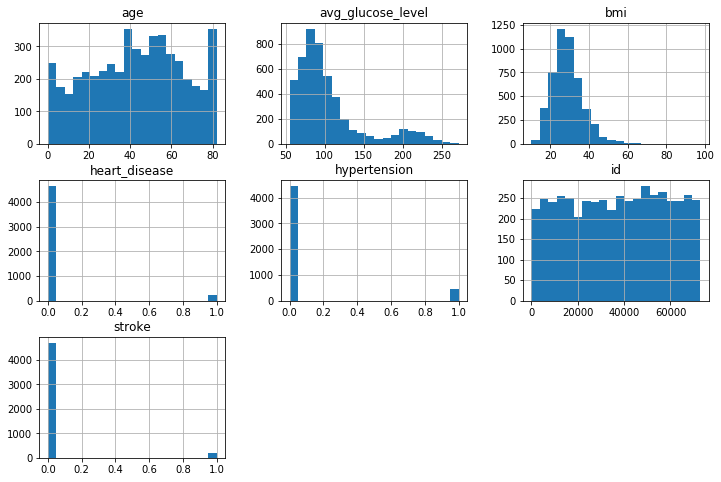

In [33]:
df1.hist(figsize=(12,8),bins=20)

## Feature Engineering 

### Categorical Encoding 

In [34]:
df1.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5104,Female,No,children,Rural,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['gender']=le.fit_transform(df1['gender'])

df1['ever_married']=le.fit_transform(df1['ever_married'])

df1['Residence_type']=le.fit_transform(df1['Residence_type'])

In [36]:
df1.select_dtypes(include='object')

,work_type,smoking_status
0,Private,formerly smoked
2,Private,never smoked
3,Private,smokes
4,Self-employed,never smoked
5,Private,formerly smoked
...,...,...
5104,children,never smoked
5106,Self-employed,never smoked
5107,Self-employed,never smoked
5108,Private,formerly smoked


In [37]:
df_dum=pd.get_dummies(df1.select_dtypes(include='object'), drop_first=True)
df_dum

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,0
2,0,1,0,0,1,0
3,0,1,0,0,0,1
4,0,0,1,0,1,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
5104,0,0,0,1,1,0
5106,0,0,1,0,1,0
5107,0,0,1,0,1,0
5108,0,1,0,0,0,0


In [38]:
df1=pd.concat([df1,df_dum],axis='columns')
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0,0,0,0
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,1,0,0,1,0
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,0,1,0,1,0
5,56669,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,0,1,0,0,0,0


In [39]:
df1.drop(['id','smoking_status','work_type','work_type_Never_worked'],axis=1,inplace=True)

In [40]:
df1

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,1,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,1,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,1,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,1,0,0,0,0


In [41]:
x=df1.drop('stroke',axis=1)

y=df1['stroke']

In [42]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,1,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,1,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,1,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,1,0,0,0,0


### Finding correlation

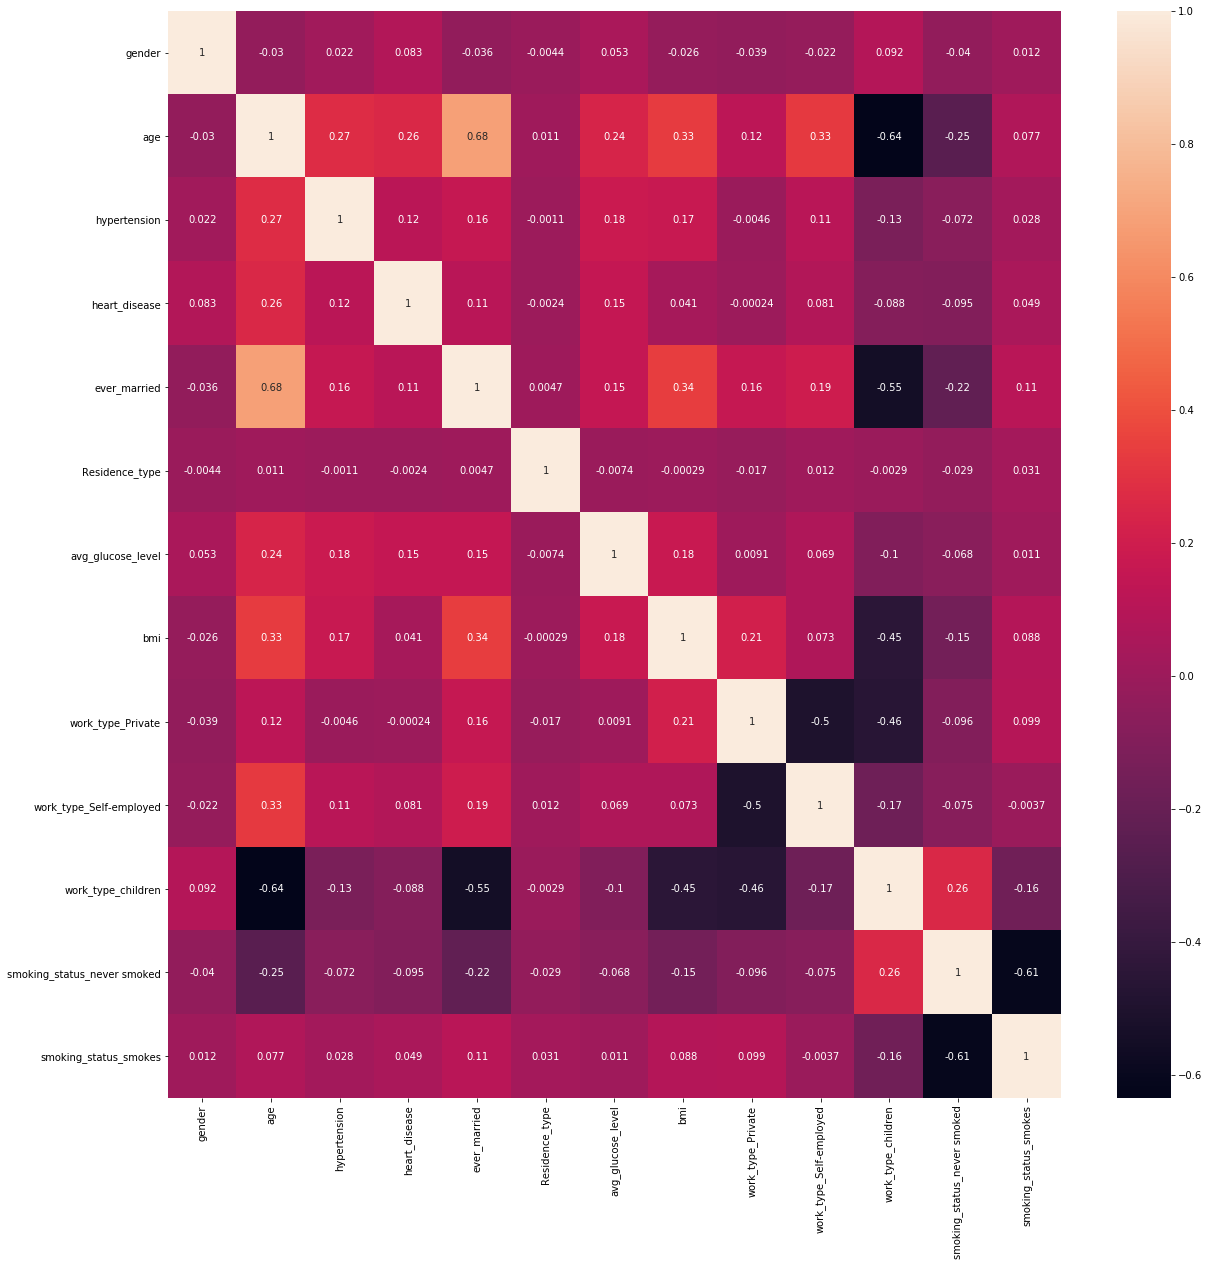

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)

In [44]:
# find and remove correlated features
threshold=0.60
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
correlation(x,threshold)

{'ever_married', 'smoking_status_smokes', 'work_type_children'}

In [48]:
x.drop(['ever_married','work_type_children'],axis=1,inplace=True)

Two correlated features are removed,the remaining one is important for training.

# model using :Adaboostin Algorithm 

In [52]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [56]:
x

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,0
2,1,80.0,0,1,0,105.92,32.5,1,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1
4,0,79.0,1,0,0,174.12,24.0,0,1,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,103.08,18.6,0,0,1,0
5106,0,81.0,0,0,1,125.20,40.0,0,1,1,0
5107,0,35.0,0,0,0,82.99,30.6,0,1,1,0
5108,1,51.0,0,0,0,166.29,25.6,1,0,0,0


In [58]:
clf.fit(train_X,train_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [67]:
train_Xpred=clf.predict(train_X)
train_Xpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
clf.predict([[1,67.0,0,1,1,228.69,36.6,1,0,0,0]])

array([0], dtype=int64)

In [70]:
clf.score(train_X,train_Y)

0.9617931737137035

In [71]:
clf.score(test_X,test_Y)

0.9439918533604889